In [182]:
import pandas as pd

In [183]:
df=pd.read_csv('/content/Iris.csv')
df=pd.DataFrame(df)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [185]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [186]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [187]:
df1=df.drop(columns=['Id','SepalWidthCm','SepalLengthCm'])
df1.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

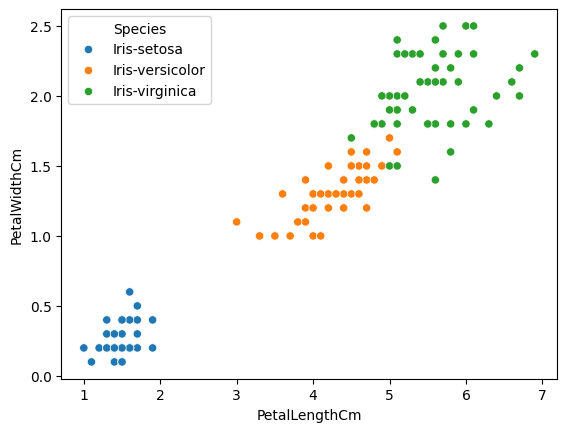

In [188]:
import seaborn as sns
sns.scatterplot(data=df1, x="PetalLengthCm", y="PetalWidthCm", hue='Species')

In [189]:
df=df1.drop(columns=['Species'])
df.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [170]:
scaled_df=pd.DataFrame(data=data, columns=['PetalLengthCm','PetalWidthCm'])
scaled_df.head()

,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [171]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

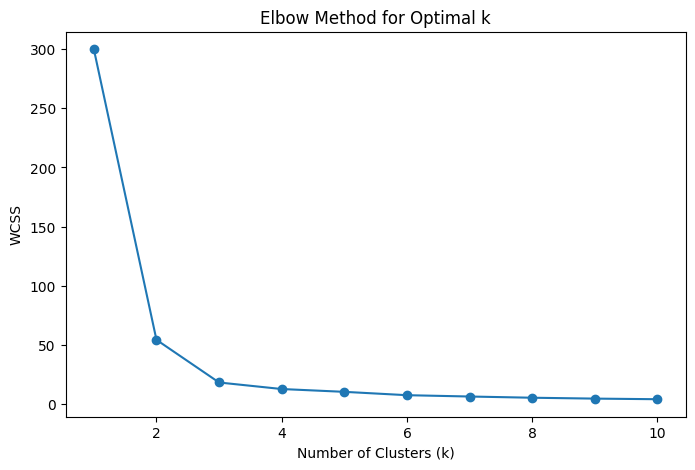

In [172]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [173]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 2: Fit the KMeans model on your data
kmeans.fit(scaled_df[['PetalLengthCm', 'PetalWidthCm']])

KMeans(n_clusters=3, random_state=42)

In [177]:
# Step 3: Predict cluster labels for each data point
scaled_df['Cluster'] = kmeans.predict(scaled_df[['PetalLengthCm', 'PetalWidthCm']])
print(scaled_df['Cluster'].sample(10))

81     2
64     2
95     2
72     2
145    0
75     2
129    0
31     1
144    0
105    0
Name: Cluster, dtype: int32


In [178]:
# Step 4: Calculate silhouette score
score = silhouette_score(scaled_df[['PetalLengthCm', 'PetalWidthCm']], scaled_df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.67


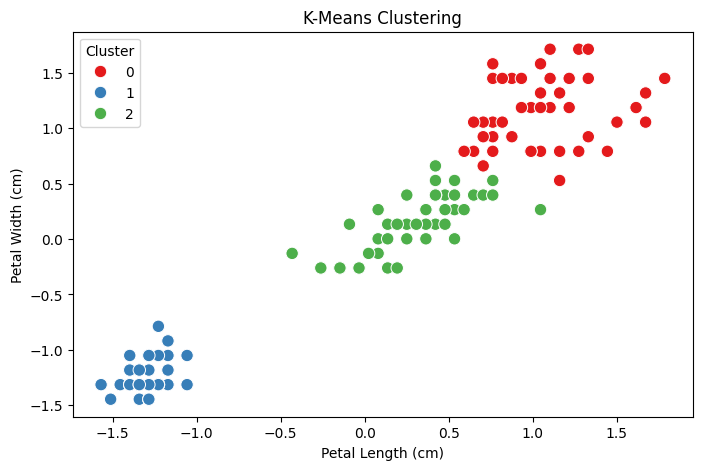

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=scaled_df['PetalLengthCm'],
    y=scaled_df['PetalWidthCm'],
    hue=scaled_df['Cluster'],
    palette='Set1',
    s=80
)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


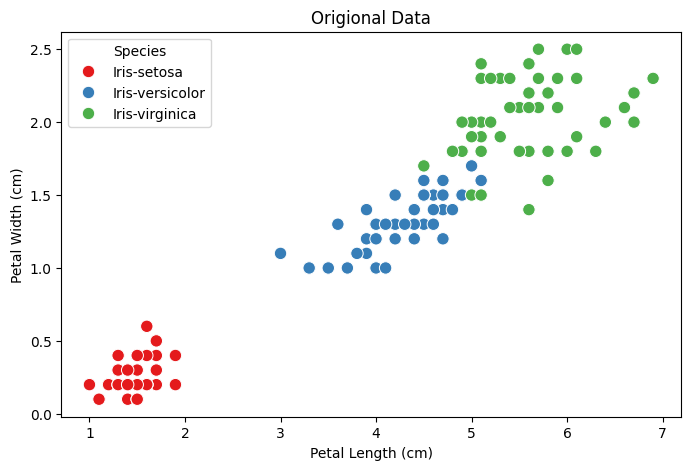

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df1['PetalLengthCm'],
    y=df1['PetalWidthCm'],
    hue=df1['Species'],
    palette='Set1',
    s=80
)
plt.title('Origional Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()
